In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
train_data = pd.read_csv('./emnist-balanced-train.csv', header = None)
val_data = pd.read_csv('./emnist-balanced-test.csv', header = None)

In [81]:
X_train = train_data.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1)
y_train = train_data.iloc[:, 0].to_numpy()

X_val = val_data.iloc[:, 1:].to_numpy().reshape(-1, 28, 28, 1)
y_val = val_data.iloc[:, 0].to_numpy()

## create mapping

In [113]:
import string
nums = list(string.digits)
upper = list(string.ascii_uppercase)
lower = list('abdefghnqrt')
classes = nums + upper + lower

mapping = {}
for i, value in enumerate(classes):
    mapping[i] = value
    pass

## visualize dataset

In [22]:
import matplotlib.pyplot as plt

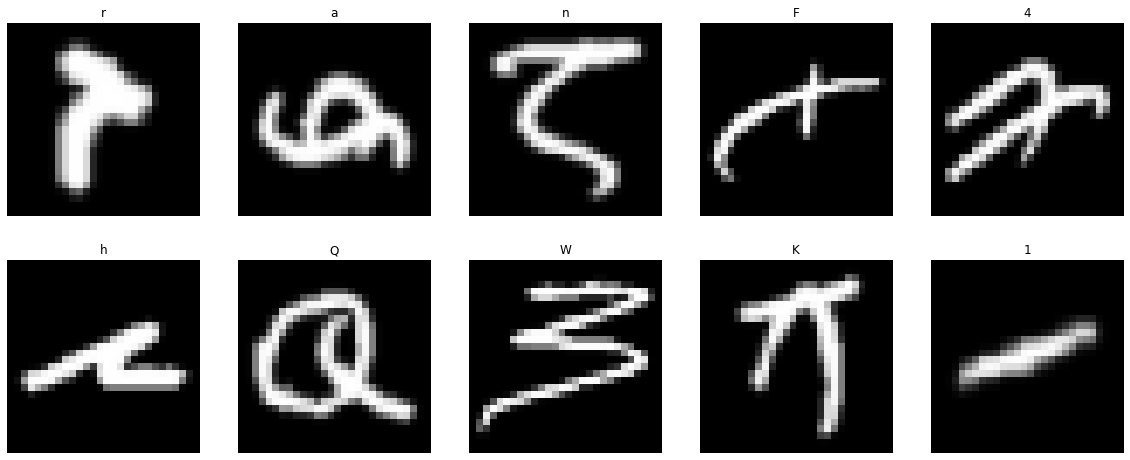

In [114]:
plt.figure(figsize = (20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    plt.title('{}'.format(mapping[y_train[i]]))
    plt.axis('off')
    pass
plt.show()

## create dataset

In [82]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [83]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [84]:
train_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.int64, tf.int64)>

## train model

In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (28, 28, 1), name = '1st_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '1st_pooling'),
    tf.keras.layers.Conv2D(16, (5, 5), activation = 'relu', name = '2nd_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '2nd_pooling'),
    tf.keras.layers.Flatten(name = 'flatten'),
    tf.keras.layers.Dropout(0.5, name = '1st_dropout'),
    tf.keras.layers.Dense(120,activation='relu', name = '1st_fc'),
    tf.keras.layers.Dense(84,activation='relu', name = '2nd_fc'),
    tf.keras.layers.Dense(47, name = '3rd_fc')
])

In [101]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_conv (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
1st_pooling (AveragePooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
2nd_pooling (AveragePooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
1st_dropout (Dropout)        (None, 256)               0         
_________________________________________________________________
1st_fc (Dense)               (None, 120)             

In [102]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_sparse_categorical_accuracy', 
    patience = 5, 
    mode = 'auto'
)

In [103]:
model.fit(
    train_dataset,
    epochs=50,
    callbacks = [callbacks],
    validation_data=test_dataset,
)

Epoch 1/50
1763/1763 [==============================] - 29s 16ms/step - loss: 1.8543 - sparse_categorical_accuracy: 0.5048 - val_loss: 0.6843 - val_sparse_categorical_accuracy: 0.7819
Epoch 2/50
1763/1763 [==============================] - 29s 17ms/step - loss: 0.8541 - sparse_categorical_accuracy: 0.7244 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.8185
Epoch 3/50
1763/1763 [==============================] - 34s 20ms/step - loss: 0.7247 - sparse_categorical_accuracy: 0.7601 - val_loss: 0.4852 - val_sparse_categorical_accuracy: 0.8344
Epoch 4/50
1763/1763 [==============================] - 34s 19ms/step - loss: 0.6670 - sparse_categorical_accuracy: 0.7781 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.8435
Epoch 5/50
1763/1763 [==============================] - 30s 17ms/step - loss: 0.6293 - sparse_categorical_accuracy: 0.7879 - val_loss: 0.4440 - val_sparse_categorical_accuracy: 0.8471
Epoch 6/50
1763/1763 [==============================] - 29s 17ms/step - loss: 0.